In [ ]:
%%html
<style type="text/css">
  span.ecb { background: yellow; }
</style>

<span class="ecb">Grading comments by ECB will be highlighted like this.</span>

<span class="ecb">Total 63/70</span>

# ATMO 5331 - Homework 1 - Fall 2025
## Due 12 Sep 2025, 11:59 pm.

When doing this homework, remember that you have two jobs:
1. Make it work.
2. Clean it up so that I can understand what you've done. If you think I might not understand, document it with a comment or a function docstring.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in groups of up to 3. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring there is an even contribution by your partner.

In [1]:
# Melodie Martinez
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

**1.** Create the 1D arrays `lon` and `lat`, centered on MCOM and incrementing by 5 degrees. There should be 7 longitude and 5 latitude values. (10 pts.)

The sample code also includes data array `d` with the shape (`nlat`, `nlon`), and defines some values so that we all have the same dataset. A plot of the data array in index coordintes is also included.

Together these arrays define the grid cell center locations and corresponding data values.

[-116.88037186 -111.88037186 -106.88037186 -101.88037186  -96.88037186
  -91.88037186  -86.88037186]
[23.5818617 28.5818617 33.5818617 38.5818617 43.5818617]


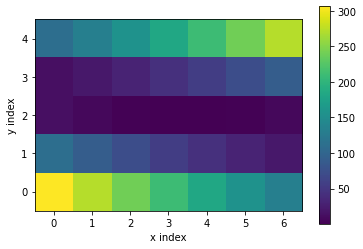

In [3]:
nlon = 7
nlat = 5
dlon, dlat = 5.0, 5.0

d = (np.arange(nlon*nlat) - (nlon*nlat/2.0))**2.0
d.shape = (nlat, nlon)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower')
plt.colorbar(im)
ax.set_xlabel('x index')
ax.set_ylabel('y index')

lon = mcom_lon + (np.arange(nlon) - nlon // 2) * dlon    # 33°34'54.9"N 101°52'51.2"W FIX THIS
lat = mcom_lat + (np.arange(nlat) - nlat // 2) * dlat

print(lon)
print(lat)

**2.** Since the image is regularly gridded in lon/lat We can use the `extent` keyword argument to `imshow` to specify the bounds of the image, as you see below. Is this plot correct or incorrect? Explain how the `extent` keyword argument works using the language of centers, edges, and nodes. (10 pts.)

`print(ax.axis())` might be useful in understanding what you are seeing.

(-116.8803718553, -86.8803718553, 23.581861701500003, 43.5818617015)


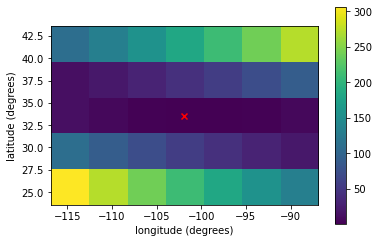

In [4]:
# Computing extent using pixel edges
extent = (lon.min() - dlon / 2, lon.max() + dlon / 2, lat.min() - dlat / 2, lat.max() + dlat / 2)

# Extent tells imshow where the edges of the image lie, not the center! 
# This helps to align the image correclty with any overlaying images
# The plot would be incorrect if extent is using lon.min() and lon.max() as a pixel center and won't be aligned correctly
# Centers: where the pixel's value is defined
# Edges: Boundaries between the pixels (extent)
# Nodes: Centers in structured grids
# The correct plot would be when extent is calculated from using edges, not centers

fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.imshow(d, origin='lower', extent=(lon.min(), lon.max(), lat.min(), lat.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')
print(ax.axis())

ANSWER: No, it is not correct

<span class="ecb">-3: explanation?</span>

**3.** Write a function that converts 1D center positions to edge positions. The function should calculate the grid spacing using only the information in the variable `x`. Use the closest adjacent spacing to extend the start and end of the array. Use this function to create two arrays `lat_edge` and `lon_edge` and print their values. Is the new figure created with `imshow` correct? Explain your answer. (20 pts.)

[-119.38037186 -114.38037186 -109.38037186 -104.38037186  -99.38037186
  -94.38037186  -89.38037186  -84.38037186]
[21.0818617 26.0818617 31.0818617 36.0818617 41.0818617 46.0818617]


Text(0, 0.5, 'latitude (degrees)')

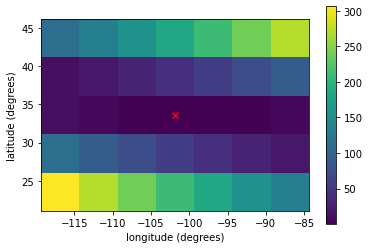

In [5]:
def centers_to_edges_1d(x):
    """Creating function for converting 1D array to edge positions."""
    x= np.asarray(x)
    dx= np.diff(x)
    
    start= x[0]-dx[0]/2    # Fixing edge positons using closest spacing
    end= x[-1]+dx[-1]/2
    
    edges= x[:-1]+dx/2    # midpoints between each center for the inside edges
    return np.concatenate([[start], edges, [end]]) #concatenating start, internal edges, and the end

lon_edge = centers_to_edges_1d(lon)
lat_edge = centers_to_edges_1d(lat)
print(lon_edge)
print(lat_edge)

#redoing and shifting the edges of the lat and lon
im= ax.imshow(d, origin= 'lower', extent= (lon_edge.min(), lon_edge.max(), lat_edge.min(), lat_edge.max()))

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(d, origin='lower', extent=(lon_edge.min(), lon_edge.max(), lat_edge.min(), lat_edge.max()))
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

<span class="ecb">Explanation? -4</span>

**4.** `imshow` works for the data so far because we have a regular grid with even spacing, so we only need to specify the corners. For a more general quadrilateral mesh, we can use `pcolormesh` to create a similar plot. 

Read the [documentation for pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) and choose the correct `shading` method for the dataset when the "centers" and "edges" locationns are specified.

What is the rule you used to select the keyword argument?

Text(0, 0.5, 'latitude (degrees)')

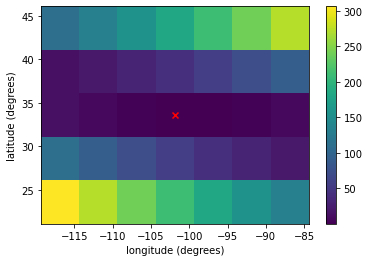

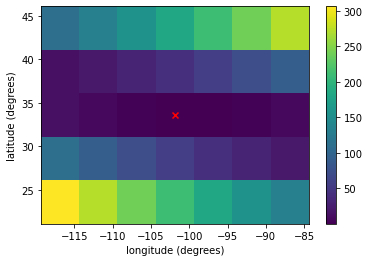

In [6]:
# Here, set the keyword argument `shading` that will be passed to pcolormesh. You may not choose 'auto'.
centers_shading = 'nearest'
edges_shading = 'flat'


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon, lat, d, shading=centers_shading)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')


fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.pcolormesh(lon_edge, lat_edge, d, shading=edges_shading)
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')

ANSWER: For pcolormesh, if the coordinate arrays are the same shape as the data that represent centers, we need to use "nearest" in our code. On the other hand, if the arrays are one element larger than the data for the edges, then we need to use "flat" in the code. 

For "nearest": Each grid point will have a color centered on it, extending halfway between the adjacent grid centers. The dimensions of X and Y must be the same as C.
For "flat": The dimensions of X and Y should be one greater than those of C; if they are the same as C, then a deprecation warning is raised, and the last row and column of C are dropped.

**5.** So far, you have used 1D coordinate arrays, and things worked fine because the data were regularly gridded. `pcolormesh` will also accept 2D coordinate arrays. The function `np.meshgrid` creates 2D arrays from 1D arrays. Use `meshgrid` to create these 2D coordinate arrays and use them to make a plot of the data using `pcolormesh`. It should match the correct plot(s) above (20 pts.).

Since you have them, use the "edges" version of your locations.

In [7]:
# 2D coordinate arrays
lon_edge_2d, lat_edge_2d = np.meshgrid(lon_edge, lat_edge, indexing='xy') 

d shape: (5, 7)
lat_edge_2d shape: (6, 8)
lon_edge_2d shape: (6, 8)


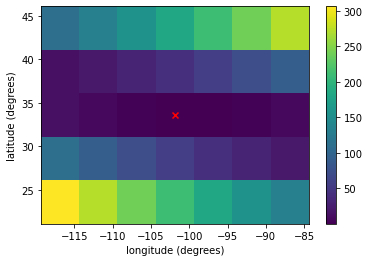

In [8]:
# Printing values
print("d shape:", d.shape)
print("lat_edge_2d shape:", lat_edge_2d.shape)
print("lon_edge_2d shape:", lon_edge_2d.shape)

#Plots
fig= plt.figure()
ax= fig. add_subplot(111)
im= ax.pcolormesh(lon_edge_2d, lat_edge_2d, d, shading= 'flat')
plt.colorbar(im)
ax.scatter(mcom_lon, mcom_lat, marker='x', color='red')
ax.set_xlabel('longitude (degrees)')
ax.set_ylabel('latitude (degrees)')
plt.show()